In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [60]:
# Parameters from http://www.aliensaint.com/uo/java/rd/
n = 256
Du, Dv, F, K = 0.16, 0.08, 0.035, 0.065

In [61]:
Z = np.zeros((n+2, n+2), [('U', np.double), ('V', np.double)])
U, V = Z['U'], Z['V']
u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]

In [62]:
r = 20
u[...] = 1.0
U[n//2-r:n//2+r, n//2-r: n//2+r] = 0.5
V[n//2-r:n//2+r, n//2-r: n//2+r] = 0.25
u += 0.05*np.random.uniform(-1, +1, (n, n))
v += 0.05*np.random.uniform(-1, +1, (n, n))

In [63]:
def update(frame): 
  global U, V, u, v, im
  
  for i in range(10):
    Lu = U[:-2, 1:-1] + U[1:-1, :-2] - (4*U[1:-1,1:-1]) + U[1:-1, 2:] + U[2:, 1:-1]
    Lv = V[:-2, 1:-1] + V[1:-1, :-2] - (4*V[1:-1,1:-1]) + V[1:-1, 2:] + V[2:, 1:-1]
    
    uvv = u * v*v
    u += (Du*Lu - uvv + F*(1-u))
    v += (Dv*Lv + uvv - (F+K)*v)
    
  im.set_data(v)
  im.set_clim(vmin=V.min(), vmax=V.max())
    

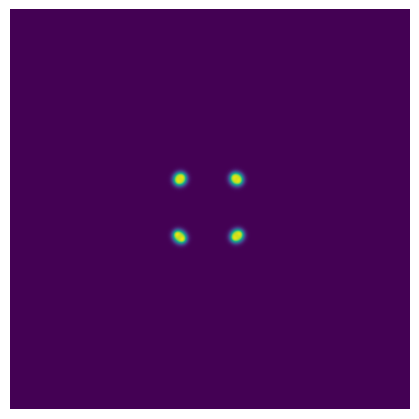

In [67]:
fig = plt.figure(figsize=(4, 4))
fig.add_axes([0.0, 0.0, 1.0, 1.0], frame_on=False)
im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.viridis)
plt.xticks([]), plt.yticks([])

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='me'), bitrate=1800)

anim = animation.FuncAnimation(fig, update, interval=10, frames=100)
anim.save('./outputs/reaction_diffusion.mp4', writer=writer)

plt.show()